# Medical Appointment No Shows - [No-show appointments]

## Table of Contents
* <a href="#intro">1. Introduction</a>
  * <a href="#sec1.1"> 1.1. Data description </a>
  * <a href="#sec1.2"> 1.2. Initial statements </a>
  * <a href="#sec1.3"> 1.3. Questions for Analysis </a>

* <a href="#wrangling">2. Data Wrangling</a>
  * <a href="#sec2.1"> 2.1. General properties </a>
  * <a href="#sec2.2"> 2.2. Numerical attributes and outliers</a>
    * <a href="#sec2.2.1"> 2.2.1. PatientID</a>
    * <a href="#sec2.2.2"> 2.2.2. AppointmentID</a>   
    * <a href="#sec2.2.3"> 2.2.3. Age attribute</a>   
    * <a href="#sec2.2.4"> 2.2.4. Handcap attribute</a>
    * <a href="#sec2.2.5"> 2.2.5. Rest of the Numerical attribute</a>

  * <a href="#sec2.3"> 2.3. Categorical attributes</a>
    * <a href="#sec2.3.1"> 2.3.1. Gender attribute</a>   
    * <a href="#sec2.3.2"> 2.3.2. Schedule and appointment date</a>
    * <a href="#sec2.3.3"> 2.3.3. Day of Week (DOW) & Waiting days</a>
    * <a href="#sec2.3.4"> 2.3.4. Neighborhood names</a>
    * <a href="#sec2.3.5"> 2.3.5. No-show class</a>
  * <a href="#sec2.4"> 2.4. Data wrangling overview</a>
  
* <a href="#eda">3. Exploratory Data Analysis</a>
  * <a href="#EDA_question1">3.1. Exploring no-showing appointments</a>
    * <a href="#sec3.1.1"> 3.1.1. Day of Week(DOW) </a>
    * <a href="#sec3.1.2"> 3.1.2. Waiting time between the scheduling and the appointment date </a>
    * <a href="#sec3.1.3"> 3.1.3. Neighborhood analysis </a>    
  * <a href="#EDA_question2">3.2. Exploring the patient profiles</a>

* <a href="#conclusions">4. Conclusions</a>
  * <a href="#sec4.1"> 4.1. Limitation of Analysis</a>
  * <a href="#sec4.2"> 4.2. Summary of conclusions</a>

<a id='intro'></a>
## 1. Introduction
In this section we briefly introduce the data and features we have, the setup for our analysis, and the hypothesis we will look into. 

<a id='sec1.1'></a>

### 1.1. Dataset description 
This dataset collects information from 110,527 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 14 associated characteristics about the patient are included in each row.

**PatientID**
<li>Identification of a patient.</li>

**AppointmentID**
<li>Identification of each appointment.</li>

**Gender**
<li>Male or Female. Note: Female is the greater proportion, woman takes way more care of they health in comparison to man.</li>

**ScheduledDay**
<li>The day patient set up their appointment.</li>

**AppointmentDay**
<li>The day of the actual appointment.</li>

**Age**
<li>Patient age</li>

**Neighbourhood**
<li>Indicates the location of the hospital.</li>

**Scholarship**
<li>Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>

**Hipertension**
<li>Hipertension. True or False.</li>

**Diabetes**
<li>Diabetes. True or False.</li>

**Alcoholism**
<li>Alcoholism. True or False.</li>

**Handcap**
<li>Handicapped. True or False.</li>

**SMS_received**
<li>1 or more messages sent to the patient.</li>

**No-show**
<li>'No' if the patient showed up to their appointment, and 'Yes' if they did show up</li>

<a id='sec1.2'></a>
### 1.2. Initial statements
This section sets up import statements for all the packages that will be used throughout this python notebook.

In [1]:
# Data analysis packages:
import numpy as np
import pandas as pd

# Vusialization packages:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.listdir("../Project-1/Database_No_show_appointments/"))

['noshowappointments-kagglev2-may-2016.csv']


In [3]:
pd.read_csv('../Project-1/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv').head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

<a id='sec1.3'></a>
### 1.3. Questions for Analysis

From the dataset information and its attributes, the following questions can be formulated:

* **Regarding the no-showing appointents**:
    - Do the patients forget the appointment?
    - What is the average waiting time between the scheduling data and the appointment date?
    
* **Regarding the patient profile**:
    - Is there any common characteristics among those patients that miss appointments?
    - What is the *missing appointments per patient* relation in the dataset?
    - How many patients have missed an appointment at least once?
    - Patients suffering from serious illnesses show up more on the appointment date?
    
* **Regarding the health unite**:
    - What are the neighbourhoods with the highest no-showing rate?
    - Considering there are common characteristics among those who do not attend the appointments, how these characteristics are geographically distributed?
    
* **Regarding the data**:
    - Is the data balanced in relation to the interest class (showing/no-showing to appointments)?
    - How is the data distributed in relation to the location(neighborhood)? 
    - Does patients who wait less for their appointments show up to their appointments more?
    - Does age affect if the patient will show up for scheduled appointment?
    - Does being handicapped affect if the patient will show up for scheduled appointment?
    - What about other factors such as (scholarship, hypertension, diabetes, alcoholic, reminder SMS)


<a id='wrangling'></a>
## 2. Data Wrangling

In this section the data will be loaded and some operations will be performed to inspect data types, to look for missing values or possibly errant data. Data cleaning operations will be executed in the same section where a specific attribute is being analyzed.

<a id='sec2.1'></a>
### 2.1. General Properties

### Load Data


In [4]:
# Load the data
df = pd.read_csv('../Project-1/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [5]:
print("The shape of the DataFrame is => {}".format(df.shape))

The shape of the DataFrame is => (110527, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- Column names inconsistent.
- Typos in column names.
- ScheduledDay and AppointmentDay should be Datetime format.

In [7]:
# check unique
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- There are 110527 appointments but only 62299 patients -> some patients have multiple appointments.
- Age has 104 unique values -> something might be wrong

In [8]:
# Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

- There's no missing value in the dataset

In [9]:
# Check duplicate rows
df.duplicated().sum()

0

- There's no duplicate rows

### Conclude the findings about the dataset

**General**:
1. Column names are inconsistent. (Upper & lowercase)
2. Some columns have typos. (ex: Hipertension -> Hypertension, Handcap -> Handicap)
3. Null values does not exists in this dataset.
4. No duplicated rows in the dataset.

**Features**:
1. PatientID and AppointmentID should be string type.
2. ScheduleDay and AppointmentDay are strings not datetime dtype.
3. AppointmentDay does not record the exact time, just date. change to YYYY-MM-DD.
4. PatientID is less than AppointmentID: Some patient may revisit several times.
5. Age has 104 unique values (-1~115). 
6. Handcap values are (0,1,2,3,4) stands for different levels of being  a Handicap.
7. No-show feature is string, change to (0, 1) where '1' for patients who did no show up and '0' for who showed up.



In [10]:
# Duplicate dataframe for modification
df_mod=df.copy()
df_mod.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

- We will use **df_mod** for any modifications to the dataset.

In [11]:
# Rename all variables to be in conventional naming
df_mod.rename(columns=lambda x:x.lower().replace('-','_'), inplace = True)
df_mod.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [12]:
# get rid of typos and rename columns to be lowercase and consistent
df_mod.rename(columns={'hipertension': 'hypertension', 'handcap':'handicap'}, inplace=True)
df_mod.head()

patientid  appointmentid gender          scheduledday  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         appointmentday  age      neighbourhood  scholarship  hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handicap  sms_received no_show  
0         0           0         0             0      No  
1         0           0         0             0      No  
2         0           0         0             0      No  
3         0           0         0             0      No  
4         1           0         0             0      No

<a id='sec2.2'></a>
### 2.2. Numerical attributes and outliers

In [13]:
df_mod.describe()

patientid  appointmentid            age    scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        hypertension       diabetes     alcoholism       handicap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        sms_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

**Numerical attributes: ['patientid', 'appointmentid', 'age', 'scholarship', 'hypentension', 'diabetes', 'alcoholism','handicap', 'sms_received']**

<a id='sec2.2.1'></a>
#### 2.2.1 PatientID:

- PatientID represents the patient identification, any numerical operations should not be applied to it and therefore it will be transformed into a string type

In [14]:
# Converting the values to int type and then to str type:
df_mod['patientid'] = df_mod['patientid'].apply(lambda x: str(int(x)));
df_mod['patientid'].dtypes

dtype('O')

In [15]:
# Counting how many unique patients are in the dataset:
print("The number of unique patients => {}".format(len(df_mod['patientid'].unique())))

The number of unique patients => 62299


<a id='sec2.2.2'></a>
#### 2.2.2 AppointmentID:

- AppointmentID represents the appointment identification, any numerical operations should not be applied to it and therefore it will be transformed into a string type

In [16]:
## Converting the values to int type and then to str type:
df_mod['appointmentid'] = df_mod['appointmentid'].apply(lambda x: str(int(x)));

In [17]:
# Counting how many unique appointments are in the dataset:
print("The number of unique appointments => {}".format(len(df_mod['appointmentid'].unique())))

The number of unique appointments => 110527


This attribute seems to be consistent: there are 110,527 instances in the dataset, as well as 110,527 unique values for the appointmentIDs. For last, since each instance corresponds to an appointment register, we will redefine the dataset index to the appointment IDs. 

In [18]:
df_mod.set_index('appointmentid', drop=True, inplace=True)
df_mod.head()

patientid gender          scheduledday  \
appointmentid                                                 
5642903         29872499824296      F  2016-04-29T18:38:08Z   
5642503        558997776694438      M  2016-04-29T16:08:27Z   
5642549          4262962299951      F  2016-04-29T16:19:04Z   
5642828           867951213174      F  2016-04-29T17:29:31Z   
5642494          8841186448183      F  2016-04-29T16:07:23Z   

                     appointmentday  age      neighbourhood  scholarship  \
appointmentid                                                              
5642903        2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0   
5642503        2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   
5642549        2016-04-29T00:00:00Z   62      MATA DA PRAIA            0   
5642828        2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0   
5642494        2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0   

               hypertension  diabetes  alcoholism  handicap  sms_received  \
appointmentid                                                               
5642903                   1         0           0         0             0   
5642503                   0         0           0         0             0   
5642549                   0         0           0         0             0   
5642828                   0         0           0         0             0   
5642494                   1         1           0         0             0   

              no_show  
appointmentid          
5642903            No  
5642503            No  
5642549            No  
5642828            No  
5642494            No

<a id='sec2.2.3'></a>
#### 2.2.3 Age attribute:

In [19]:
# Print Unique Values for 'Age'
print("Unique Values in 'Age' => {}".format(np.sort(df_mod.age.unique())))

Unique Values in 'Age' => [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


It is not possible to be aged $-1$, as well as older than $100$ years are suspicious. Patients aged $0$ are supposed to be infants.
The former will be analyzed appropriately at the exploratory data analysis section, but age value under zero are definitely a mistake. In this case, we will first check how many instances correspond to this before treat them.

In [20]:
# Find the appointment that age < 0
df_mod[df_mod.age<0]

patientid gender          scheduledday  \
appointmentid                                                 
5775010        465943158731293      F  2016-06-06T08:58:13Z   

                     appointmentday  age neighbourhood  scholarship  \
appointmentid                                                         
5775010        2016-06-06T00:00:00Z   -1         ROMÃO            0   

               hypertension  diabetes  alcoholism  handicap  sms_received  \
appointmentid                                                               
5775010                   0         0           0         0             0   

              no_show  
appointmentid          
5775010            No

In [21]:
# Check the PatientID to see if the patient has other records
df_mod[df_mod.patientid=='465943158731293']

patientid gender          scheduledday  \
appointmentid                                                 
5775010        465943158731293      F  2016-06-06T08:58:13Z   

                     appointmentday  age neighbourhood  scholarship  \
appointmentid                                                         
5775010        2016-06-06T00:00:00Z   -1         ROMÃO            0   

               hypertension  diabetes  alcoholism  handicap  sms_received  \
appointmentid                                                               
5775010                   0         0           0         0             0   

              no_show  
appointmentid          
5775010            No

Since there is only one occurrence and cannot find other information through PatientID, I will remove the data from dataset.

In [22]:
# drop the appointment with age < 0
df_mod.drop('5775010', inplace= True)

<a id='sec2.2.4'></a>
#### 2.2.4 Handcap attribute:

- In the dataset description, it is said that the handcap attribute should cointain a boolean value. However, as seen above, this attribute assumes values from 0 to 4, probably indicating the handicap number for each patient. In this analysis, I will create another attribute **'Degree_Handicap'** to keep it and map the **'Handcap'** to 1 any value higher than 0.

- There is a typo in the attribute name.

In [23]:
df_mod['degree_handicap'] = df_mod['handicap']
df_mod['handicap'] = np.where(df_mod['handicap']>0, 1, 0)

In [24]:
df_mod['handicap'].unique()

array([0, 1])

In [25]:
df_mod['degree_handicap'].unique()

array([0, 1, 2, 3, 4])

<a id='sec2.2.5'></a>
#### 2.2.5 Rest of the Numerical attribute:

In [26]:
# Print Unique Values
print("Unique Values in 'scholar' => {}".format(df_mod.scholarship.unique()))
print("Unique Values in 'hypertension' => {}".format(df_mod.hypertension.unique()))
print("Unique Values in 'diabetes' => {}".format(df_mod.diabetes.unique()))
print("Unique Values in 'alcoholism' => {}".format(df_mod.alcoholism.unique()))
print("Unique Values in 'handicap' => {}".format(df_mod.handicap.unique()))
print("Unique Values in 'sms_received' => {}".format(df_mod.sms_received.unique()))

Unique Values in 'scholar' => [0 1]
Unique Values in 'hypertension' => [1 0]
Unique Values in 'diabetes' => [0 1]
Unique Values in 'alcoholism' => [0 1]
Unique Values in 'handicap' => [0 1]
Unique Values in 'sms_received' => [0 1]


<a id='sec2.3'></a>
### 2.3. Categorical attributes

<a id='sec2.3.1'></a>
####  2.3.1. *Gender* attribute:
Only two values are expected from this attribute. In order to check its consistency, the sum for both **Male** and **Female** classes must equal the total number of instances.


In [27]:
## Counting gender classes
df_mod.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

unbalanced for gender

<a id='sec2.3.2'></a>
####  2.3.2. Schedule and Appoingment attribute:
AppointmentDay and ScheduledDay should be datetime format. AppointmentDay only has date information while the ScheduledDay has both date and time information. Here I choose to count only date and use these feature to find out the waiting days.

In [28]:
df_mod['scheduledday'] = pd.to_datetime(df_mod.scheduledday).dt.date.astype('datetime64[ns]')
df_mod['appointmentday'] = pd.to_datetime(df_mod.appointmentday).dt.date.astype('datetime64[ns]')

In [29]:
df_mod.dtypes

patientid                  object
gender                     object
scheduledday       datetime64[ns]
appointmentday     datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
degree_handicap             int64
dtype: object

In [30]:
df_mod.head()

patientid gender scheduledday appointmentday  age  \
appointmentid                                                            
5642903         29872499824296      F   2016-04-29     2016-04-29   62   
5642503        558997776694438      M   2016-04-29     2016-04-29   56   
5642549          4262962299951      F   2016-04-29     2016-04-29   62   
5642828           867951213174      F   2016-04-29     2016-04-29    8   
5642494          8841186448183      F   2016-04-29     2016-04-29   56   

                   neighbourhood  scholarship  hypertension  diabetes  \
appointmentid                                                           
5642903          JARDIM DA PENHA            0             1         0   
5642503          JARDIM DA PENHA            0             0         0   
5642549            MATA DA PRAIA            0             0         0   
5642828        PONTAL DE CAMBURI            0             0         0   
5642494          JARDIM DA PENHA            0             1         1   

               alcoholism  handicap  sms_received no_show  degree_handicap  
appointmentid                                                               
5642903                 0         0             0      No                0  
5642503                 0         0             0      No                0  
5642549                 0         0             0      No                0  
5642828                 0         0             0      No                0  
5642494                 0         0             0      No                0

<a id='sec2.3.3'></a>
####  2.3.3. Day of Week (DOW) & Waiting days:
Relevant informations for this analysis are the the Day-of-Week (DOW) and Waiting time, in days, between the scheduling date and the appointment date. 

In [31]:
df_mod['waitingdays']=df_mod['appointmentday']-df_mod['scheduledday']

- Add ***Day of Week (DOW)*** information for scheduledday and appointmentda

In [32]:
df_mod['scheduledday_DOW'] = df_mod['scheduledday'].dt.day_name()
df_mod['appointmentday_DOW'] = df_mod['appointmentday'].dt.day_name()

- Add ***Waiting time*** information

In [33]:
df_mod['waitingdays']=df_mod['appointmentday']-df_mod['scheduledday']

In [34]:
int(str(df_mod.waitingdays[0])[:2])
df_mod.waitingdays=df_mod.waitingdays.apply(lambda x: int(str(x)[:2]))

In [35]:
# Print Unique Values for 'waitingdays'
print("Unique Values in 'waitingdays' => {}".format(np.sort(df_mod.waitingdays.unique())))

Unique Values in 'waitingdays' => [-6 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45
 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98]


- waitingdays < 0 does not make sense. I will drop these rows.

In [36]:
# Drop case of waitingdays = -6
df_mod[df_mod.waitingdays == -6]

patientid gender scheduledday appointmentday  age  \
appointmentid                                                            
5686628        998231581612122      F   2016-05-11     2016-05-05   81   

               neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
appointmentid                                                                   
5686628        SANTO ANTÔNIO            0             0         0           0   

               handicap  sms_received no_show  degree_handicap  waitingdays  \
appointmentid                                                                 
5686628               0             0     Yes                0           -6   

              scheduledday_DOW appointmentday_DOW  
appointmentid                                      
5686628              Wednesday           Thursday

In [37]:
df_mod.drop('5686628', inplace=True)

In [38]:
# Cases of waitingdays = -1
df_mod[df_mod.waitingdays == -1]

patientid gender scheduledday appointmentday  age  \
appointmentid                                                           
5679978         7839272661752      M   2016-05-10     2016-05-09   38   
5715660         7896293967868      F   2016-05-18     2016-05-17   19   
5664962        24252258389979      F   2016-05-05     2016-05-04   22   
5655637         3787481966821      M   2016-05-04     2016-05-03    7   

               neighbourhood  scholarship  hypertension  diabetes  alcoholism  \
appointmentid                                                                   
5679978          RESISTÊNCIA            0             0         0           0   
5715660        SANTO ANTÔNIO            0             0         0           0   
5664962           CONSOLAÇÃO            0             0         0           0   
5655637           TABUAZEIRO            0             0         0           0   

               handicap  sms_received no_show  degree_handicap  waitingdays  \
appointmentid                                                                 
5679978               1             0     Yes                1           -1   
5715660               1             0     Yes                1           -1   
5664962               0             0     Yes                0           -1   
5655637               0             0     Yes                0           -1   

              scheduledday_DOW appointmentday_DOW  
appointmentid                                      
5679978                Tuesday             Monday  
5715660              Wednesday            Tuesday  
5664962               Thursday          Wednesday  
5655637              Wednesday            Tuesday

In [39]:
df_mod.drop('5679978', inplace=True)
df_mod.drop('5715660', inplace=True)
df_mod.drop('5664962', inplace=True)
df_mod.drop('5655637', inplace=True)

<a id='sec2.3.4'></a>
####  2.3.4. *Neighborhood* names
Accordingly to the dataset description, this attributes refers to the neighborhoods the health units are located in the city of *Vitória*, in the State of *Espírito Santo*, Brazil.

In [40]:
# Print Unique Values for 'neighbourhood'
print("Unique Values in 'neighbourhood' => {}".format(df_mod.neighbourhood.unique()))

Unique Values in 'neighbourhood' => ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' '

In [41]:
## Counting again the neighborhood number:
len(df_mod.neighbourhood.unique())

81

In [42]:
df_mod.neighbourhood

appointmentid
5642903      JARDIM DA PENHA
5642503      JARDIM DA PENHA
5642549        MATA DA PRAIA
5642828    PONTAL DE CAMBURI
5642494      JARDIM DA PENHA
                 ...        
5651768          MARIA ORTIZ
5650093          MARIA ORTIZ
5630692          MARIA ORTIZ
5630323          MARIA ORTIZ
5629448          MARIA ORTIZ
Name: neighbourhood, Length: 110521, dtype: object

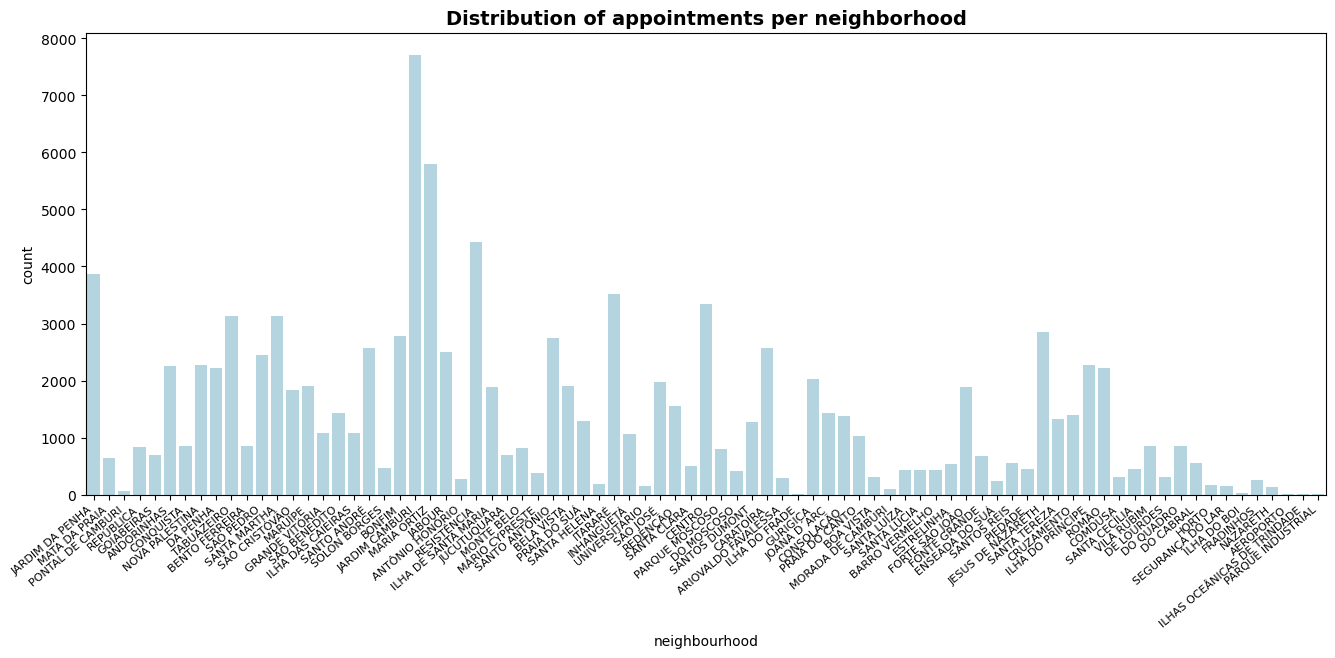

In [43]:
## Plotting an histogram with the neighborhoods sorted alphabetically. 
plt.figure(figsize=(16,6))
ax = sns.countplot(x='neighbourhood', data=df_mod, color = "lightblue")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Distribution of appointments per neighborhood', fontsize=14, fontweight='bold')
plt.show()

Among the 81 different neighborhoods, 8 of them register more than 3k appointments. 
It is mentioned there are 45 health units, which leads us to consider the neighborhood as where the patient lives.  

<a id='sec2.3.5'></a>
####  2.3.5. *No-show* class

In [44]:
## Counting gender classes
df_mod['no_show'].value_counts()

No     88207
Yes    22314
Name: no_show, dtype: int64

In [45]:
df_mod[df_mod['no_show']=='Yes']['no_show'].count()/df_mod['no_show'].count()

0.2018982817745044

From the above information we can see that there is clearly a class imbalance. Around 80% of the patients are coming for the visit after an appointment and around 20% are skipping their appointments.

In [46]:
# Change values of no_show column to be (0: show up, 1: no show)
df_mod['no_show'] =  df_mod['no_show'].apply(lambda x: 0 if x == 'No' else 1)
df_mod['no_show']=df_mod['no_show'].astype('object')
df_mod['no_show'].dtypes


dtype('O')

<a id='sec2.4'></a>
### 2.4. Data wrangling overview

Just in order to help its reading, the dataset attributes will be rearranged to put all the date and time information together, as well as correcting the typos in the attribute names:

In [47]:
## Reading the dataset attributes (columns):
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 5642903 to 5629448
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   patientid           110521 non-null  object        
 1   gender              110521 non-null  object        
 2   scheduledday        110521 non-null  datetime64[ns]
 3   appointmentday      110521 non-null  datetime64[ns]
 4   age                 110521 non-null  int64         
 5   neighbourhood       110521 non-null  object        
 6   scholarship         110521 non-null  int64         
 7   hypertension        110521 non-null  int64         
 8   diabetes            110521 non-null  int64         
 9   alcoholism          110521 non-null  int64         
 10  handicap            110521 non-null  int64         
 11  sms_received        110521 non-null  int64         
 12  no_show             110521 non-null  object        
 13  degree_handicap     110521 

In [48]:
df_mod = df_mod.reindex(columns=['patientid', 'gender', 'neighbourhood', 'age',
                         'scholarship', 'hypertension', 'diabetes','alcoholism', 'handicap', 'degree_handicap', 'sms_received', 
                         'scheduledday', 'appointmentday', 'scheduledday_DOW', 'appointmentday_DOW', 'waitingdays', 'no_show'])

In [49]:
## Reading the dataset attributes (columns):
df_mod.head()

patientid gender      neighbourhood  age  scholarship  \
appointmentid                                                                
5642903         29872499824296      F    JARDIM DA PENHA   62            0   
5642503        558997776694438      M    JARDIM DA PENHA   56            0   
5642549          4262962299951      F      MATA DA PRAIA   62            0   
5642828           867951213174      F  PONTAL DE CAMBURI    8            0   
5642494          8841186448183      F    JARDIM DA PENHA   56            0   

               hypertension  diabetes  alcoholism  handicap  degree_handicap  \
appointmentid                                                                  
5642903                   1         0           0         0                0   
5642503                   0         0           0         0                0   
5642549                   0         0           0         0                0   
5642828                   0         0           0         0                0   
5642494                   1         1           0         0                0   

               sms_received scheduledday appointmentday scheduledday_DOW  \
appointmentid                                                              
5642903                   0   2016-04-29     2016-04-29           Friday   
5642503                   0   2016-04-29     2016-04-29           Friday   
5642549                   0   2016-04-29     2016-04-29           Friday   
5642828                   0   2016-04-29     2016-04-29           Friday   
5642494                   0   2016-04-29     2016-04-29           Friday   

              appointmentday_DOW  waitingdays no_show  
appointmentid                                          
5642903                   Friday            0       0  
5642503                   Friday            0       0  
5642549                   Friday            0       0  
5642828                   Friday            0       0  
5642494                   Friday            0       0

We then conclude this data wrangling step by showing an overview of the pre-processed data, i.e. the data after the wrangling and cleansing process. 

In [50]:
## Checking again the dataset information (for numerical attributes) and description (for categorical ones):
print(df_mod.info())
df_mod.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 5642903 to 5629448
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   patientid           110521 non-null  object        
 1   gender              110521 non-null  object        
 2   neighbourhood       110521 non-null  object        
 3   age                 110521 non-null  int64         
 4   scholarship         110521 non-null  int64         
 5   hypertension        110521 non-null  int64         
 6   diabetes            110521 non-null  int64         
 7   alcoholism          110521 non-null  int64         
 8   handicap            110521 non-null  int64         
 9   degree_handicap     110521 non-null  int64         
 10  sms_received        110521 non-null  int64         
 11  scheduledday        110521 non-null  datetime64[ns]
 12  appointmentday      110521 non-null  datetime64[ns]
 13  scheduledday_DOW    110521 

age    scholarship   hypertension       diabetes  \
count  110521.000000  110521.000000  110521.000000  110521.000000   
mean       37.089386       0.098271       0.197257       0.071869   
std        23.109885       0.297682       0.397929       0.258272   
min         0.000000       0.000000       0.000000       0.000000   
25%        18.000000       0.000000       0.000000       0.000000   
50%        37.000000       0.000000       0.000000       0.000000   
75%        55.000000       0.000000       0.000000       0.000000   
max       115.000000       1.000000       1.000000       1.000000   

          alcoholism       handicap  degree_handicap   sms_received  \
count  110521.000000  110521.000000    110521.000000  110521.000000   
mean        0.030401       0.020259         0.022231       0.321043   
std         0.171690       0.140884         0.161494       0.466879   
min         0.000000       0.000000         0.000000       0.000000   
25%         0.000000       0.000000         0.000000       0.000000   
50%         0.000000       0.000000         0.000000       0.000000   
75%         0.000000       0.000000         0.000000       1.000000   
max         1.000000       1.000000         4.000000       1.000000   

         waitingdays  
count  110521.000000  
mean       10.028556  
std        14.536728  
min         0.000000  
25%         0.000000  
50%         4.000000  
75%        15.000000  
max        98.000000

<a id='eda'></a>
## 3. Exploratory Data Analysis

Once the data were trimmed and cleaned, we will move on to explore the questions posed on  <a href="#sec1.3">Section 1.3</a></li>. Given the dataset limitations, this analysis will address the first two questions, as organized in the following topics::  

* **<a href="#EDA_question1">3.1. Exploring no-showing appointments</a>**
* **<a href="#EDA_question2">3.2. Exploring the patient profiles</a>**

<a id='EDA_question1'></a>
### 3.1. Exploring the *no-showing appointments*
In this section we will seek to answer the following questions based on the available data:  
* Does DOW of the scheduled day and appointment day affect the no-showing rate?
* What is the average waiting time between the scheduling date and the appointment date?
* Is there any relation between the waiting time and the no-showing appointments?

<a id='sec3.1.1'></a>
### 3.1.1. Day of Week (DOW)

#### scheduled_DOW

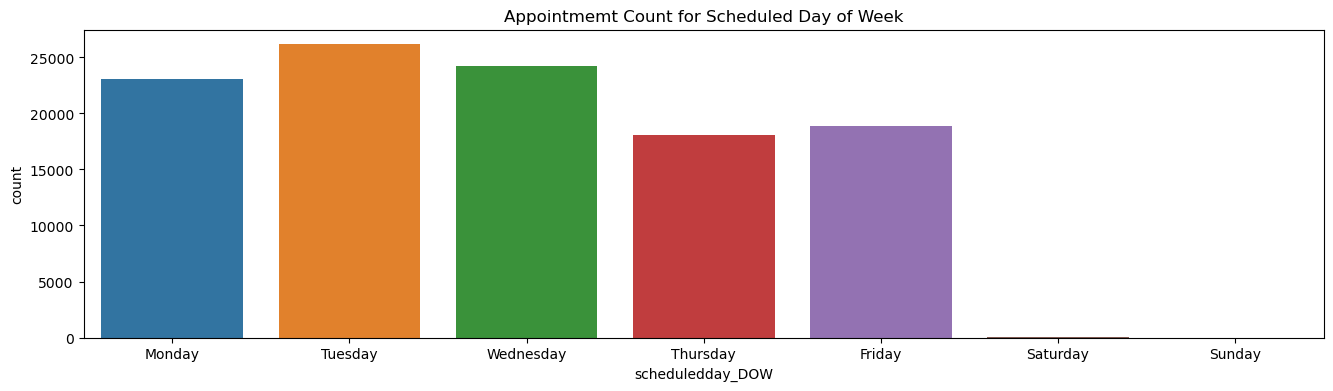

In [51]:
plt.figure(figsize=(16,4))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.countplot(x=df_mod.scheduledday_DOW, order=order)
ax.set_title('Appointmemt Count for Scheduled Day of Week')
plt.show()

#### appointment_DOW

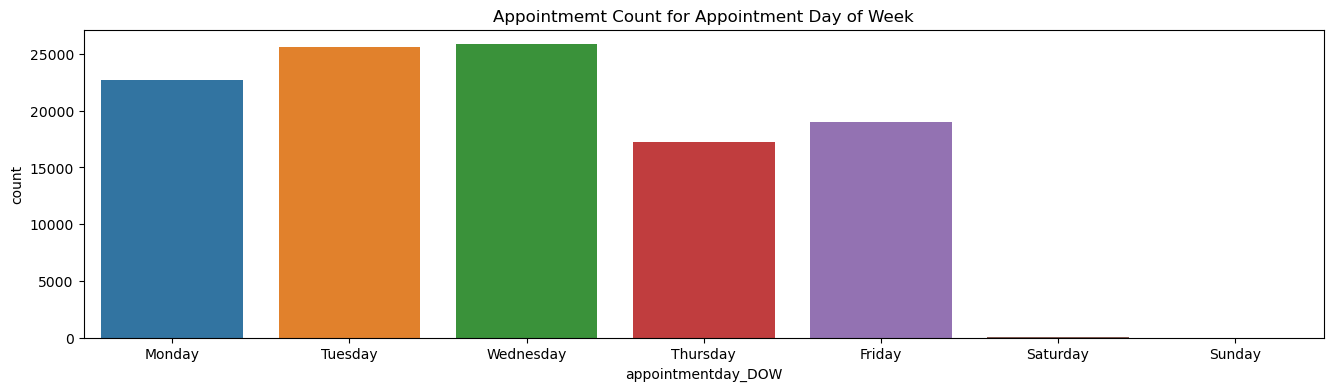

In [52]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_mod.appointmentday_DOW, order=order)
ax.set_title('Appointmemt Count for Appointment Day of Week')
plt.show()

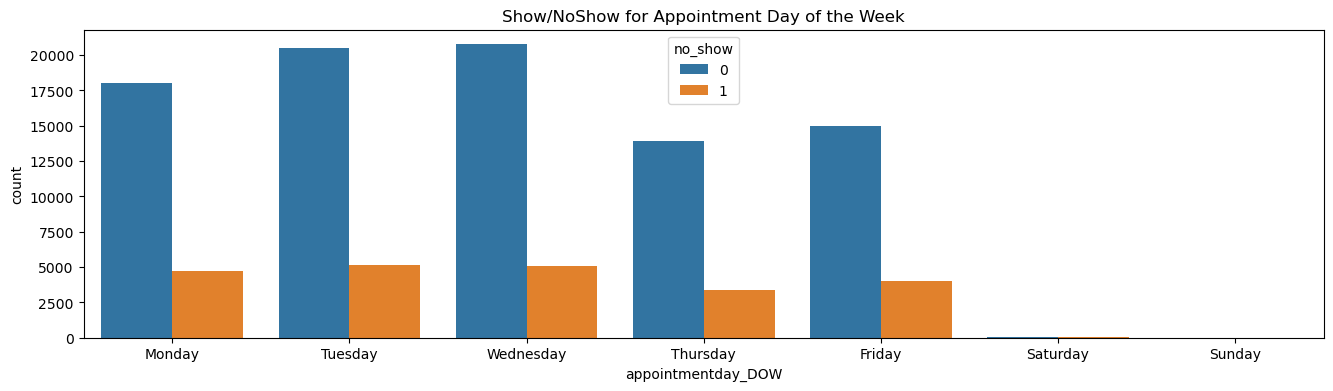

appointmentday_DOW
Friday       4037
Monday       4689
Saturday        9
Thursday     3337
Tuesday      5150
Wednesday    5092
dtype: int64


In [53]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_mod.appointmentday_DOW, hue=df_mod.no_show, order=order)
ax.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

# Counts of No-show versus DOW
print(df_mod[df_mod.no_show == 1].groupby(['appointmentday_DOW']).size())

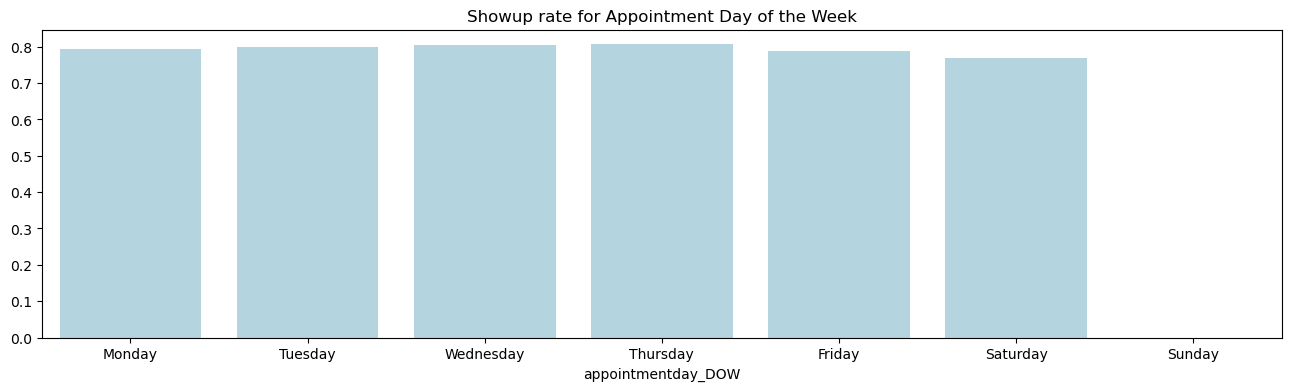

appointmentday_DOW
Friday       0.787739
Monday       0.793554
Saturday     0.769231
Thursday     0.806506
Tuesday      0.799126
Wednesday    0.803139
dtype: float64


In [54]:
# Show up rate versus DOW
df_a_dow_ratio = df_mod[df_mod.no_show == 0].groupby(['appointmentday_DOW']).size()/df_mod.groupby(['appointmentday_DOW']).size()
plt.figure(figsize=(16,4))
ax = sns.barplot(x=df_a_dow_ratio.index, y=df_a_dow_ratio, order=order, color='lightblue')
ax.set_title("Showup rate for Appointment Day of the Week")
plt.show()

print(df_a_dow_ratio)

#### Conclusion on Day of Week (DOW)
- Little or No appointments taken on Saturday and Sunday.
- The show-up rate for appointment days are arounod 76.9% to 80.7 % across the weekdays.
- AppointmentDay_DOW could help in determining if a patient visits the hospital after taking an appointment.

<a id='sec3.1.2'></a>
### 3.1.2. Waiting time between the scheduling and the appointment date

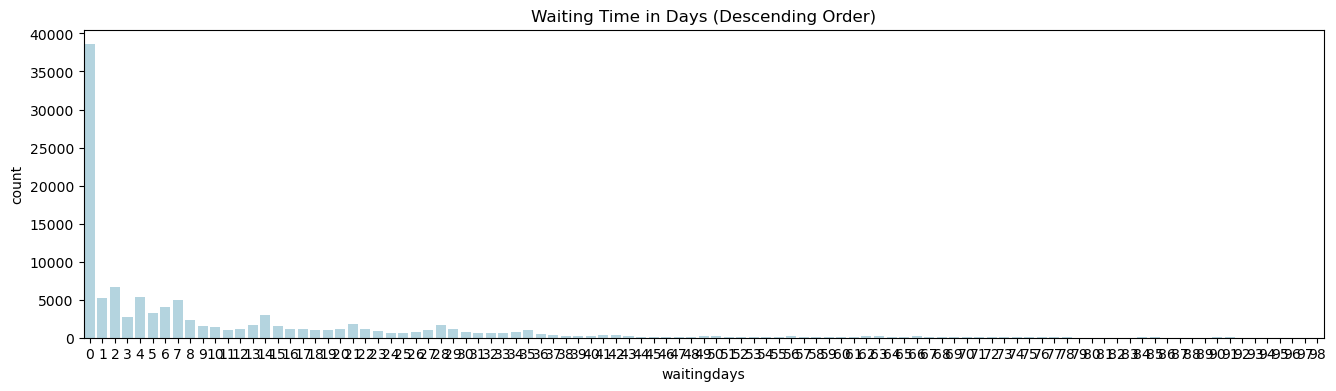

Mean: 10.028555659105509
Standard deviation: 14.536662426569231
Minimum: 0
Maximum: 98
Median: 4.0


In [55]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_mod.waitingdays, order=np.sort(df_mod.waitingdays.unique()), color='lightblue')
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()

total = df_mod.waitingdays.values
print('Mean:', np.mean(total))
print('Standard deviation:', np.std(total))
print('Minimum:', np.min(total))
print('Maximum:', np.max(total))
print('Median:', np.median(total))

- From the plot, we can notice that **most of the patients are booking their appointments on the same day**. The next highest waiting times are **2 days, 4 days, and 1 days**.

- The **average waiting is about 10 days**, with a standard deviation of approximately 15 days.

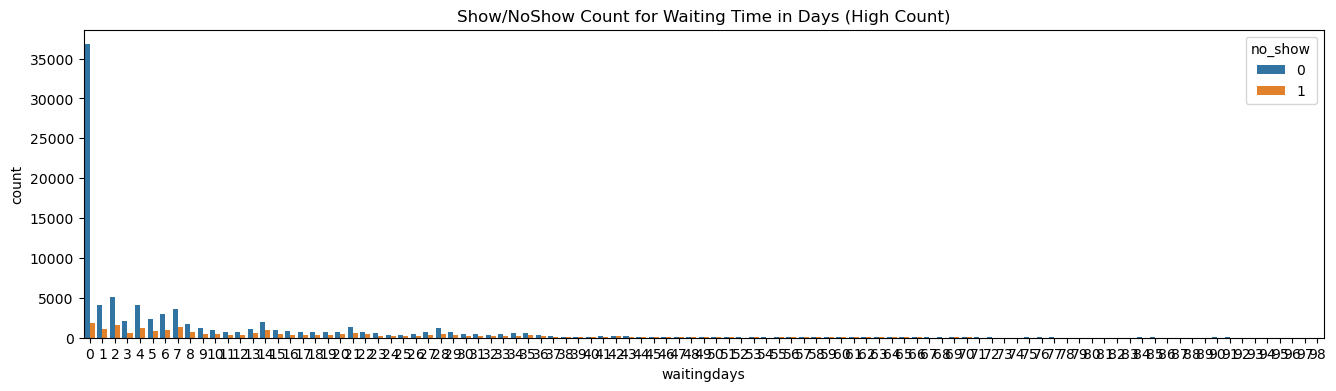

In [56]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df_mod.waitingdays, hue=df_mod.no_show, order= np.sort(df_mod.waitingdays.unique()))
ax.set_title("Show/NoShow Count for Waiting Time in Days (High Count)")
plt.show()

In [57]:
showup_time=df_mod[df_mod.no_show == 0].groupby(['waitingdays']).size()/df_mod.groupby(['waitingdays']).size()

plt.figure(figsize=(16,4))
ax = sns.lineplot(x=showup_time.index, y=showup_time, color='red')
ax.set_title("Show-up Rate vs Waiting Time in Days")
ax.axes.set_ylim(0,1)
plt.show()

From the above visualization we can see that around 95% of the patients who have booked their appointments on the same day and visiting the hospital without fail. Also close to 80% of the patients are visiting the hospital if they had booked their appointments just before 4 days. The following concludes our observations:

- Through the chart above, it is noticed that the **show-up rate decreases as the waiting gets longer**. 
- It reaches the higher rates when the attendance occurs in the same day it waas scheduled.
- Surprisingly, the **show-up rate increases after 90 days (quarter) waiting** and even reach to 100% in some days. This part will be further investigated in the later discussion.

In [58]:
# Get data for waitingdays = 0
wait0 = df_mod[df_mod['waitingdays']==0]
print('Number of Appointments for Waitingdays = 0 days: {} Appointments'.format(wait0.patientid.count()))
x1 = wait0.mean(numeric_only=True)

Number of Appointments for Waitingdays = 0 days: 38562 Appointments


In [59]:
# Get data for waitingdays > 90
wait90 = df_mod[df_mod['waitingdays']>90]
print('Number of Appointments for Waitingdays > 90 days: {} Appointments'.format(wait90.patientid.count()))
x2= wait90.mean(numeric_only=True)

Number of Appointments for Waitingdays > 90 days: 79 Appointments


In [60]:
df1=pd.DataFrame(x1)
df2=pd.DataFrame(x2)
df_compare = pd.concat([df1,df2], axis=1, ignore_index=True)
df_compare.columns=['waiting=0','waiting=90']
df_compare

waiting=0  waiting=90
age              34.452311   65.063291
scholarship       0.108656    0.050633
hypertension      0.175536    0.430380
diabetes          0.066542    0.101266
alcoholism        0.039884    0.000000
handicap          0.024169    0.063291
degree_handicap   0.026347    0.063291
sms_received      0.000000    0.645570
waitingdays       0.000000   92.265823

Same day appointment (N=38562):
- Average age: 34.5 yrs old
- Scholarship: **10% receives scholarship**
- Hypertension: 17.5% of the group individuals
- Diabetes: 6.6% of the group individuals
- Alcoholism: **3.9% of the group individuals**
- Handicap: 2.4% of the group individuals

Waitingdays > 90 (quarter) (N=79):
- Average age: **65.1 yrs old (senior)**
- Scholarship: 5.1% receives scholarship
- Hypertension: **43.0% of the group individuals**
- Diabetes: **10.1% of the group individuals**
- Alcoholism: 0.0% of the group individuals
- Handicap: **6.3% of the group individuals**

#### Conclusion on  Waiting Days
While the number of appointments for the 2 compared groups (Sameday appointments/ Waitingdays > 90) have huge differences (N=38562 vs N=79) 

We find the population with waiting period > 90 days (quarter) are mostly elderly people.
Therefore, one hypothesis to explain for the show-up rate increase for waiting periods > 90 days (quarter) can be assigned to the patient profile:

**Elderly people as well as those with chronic diseases who require regular medical follow-up tend to schedule long-term appointments and attend to them.**

<a id='sec3.1.3'></a>
### 3.1.3. Neiborhood Analysis

This analysis seeks to find out how the no-showing appointments are distributed. In other words, how many appointments are registered to each health unit and if they were attended to or not. To find this out, we will carry two slightly distinct analysis based on the neighborhood attribute:

(i) How the absence number is distributed along the neighborhoods?

(ii) We have already seen that the no-showing rate increases as the waiting gets longer. Is the validity of this statement indifferent to geographical location?

To find this out, we will first group the dataset by the neighborhood names, followed by some data manipulation to gather the desired information for each question.

**(i) No-showing rate by neighborhood**

In this analysis we will show the absence number distribution into two ways: first in absolute numbers, to get not only the information of which health unit presents more absence, but to know which one has the highest number of attendments. Second, it is interesting to compare the normalized data, i.e. how much the absence of each health unit represents the total of its attendments.

In [61]:
## Using the pandas.groupby() method to generate a pivot table:
neighbors_I = df_mod.groupby(by='neighbourhood').no_show.value_counts().sort_index()

In [62]:
## Manipulating the data:
neighbors_I = neighbors_I.unstack()  #Converting the groupby object into a dataset
neighbors_I.isna().sum()
neighbors_I.fillna(value=0, inplace=True)  #Replacing NaN values by zero
neighbors_I.head()

no_show                   0      1
neighbourhood                     
AEROPORTO               7.0    1.0
ANDORINHAS           1741.0  521.0
ANTÔNIO HONÓRIO       221.0   50.0
ARIOVALDO FAVALESSA   220.0   62.0
BARRO VERMELHO        332.0   91.0

In [63]:
def df_row_normalize(dataframe):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each line.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    return dataframe.div(dataframe.sum(axis=1), axis=0)


## Normalizing the data using a predefined function:
normalNeighbor = df_row_normalize(neighbors_I)
print(normalNeighbor.head())

no_show                     0         1
neighbourhood                          
AEROPORTO            0.875000  0.125000
ANDORINHAS           0.769673  0.230327
ANTÔNIO HONÓRIO      0.815498  0.184502
ARIOVALDO FAVALESSA  0.780142  0.219858
BARRO VERMELHO       0.784870  0.215130


In [64]:
## Getting the normalized data statistics:
normalNeighbor.describe()

no_show          0          1
count    81.000000  81.000000
mean      0.794592   0.205408
std       0.097235   0.097235
min       0.000000   0.000000
25%       0.782546   0.179907
50%       0.802412   0.197588
75%       0.820093   0.217454
max       1.000000   1.000000

In [65]:
def get_total(dataframe):
    '''Return the total sum of each numerical attribute of a pandas.Dataframe.'''
    return dataframe.sum(axis=1)


## Adding a total column:
neighbors_I['Total'] = get_total(neighbors_I)
normalNeighbor['Total'] = get_total(normalNeighbor)

In [66]:
#Reseting the 'neighbourhood' index and making it as a column:
neighbors_I.reset_index(inplace=True)  
normalNeighbor.reset_index(inplace=True)

In [67]:
normalNeighbor

no_show        neighbourhood         0         1  Total
0                  AEROPORTO  0.875000  0.125000    1.0
1                 ANDORINHAS  0.769673  0.230327    1.0
2            ANTÔNIO HONÓRIO  0.815498  0.184502    1.0
3        ARIOVALDO FAVALESSA  0.780142  0.219858    1.0
4             BARRO VERMELHO  0.784870  0.215130    1.0
..                       ...       ...       ...    ...
76                  SÃO JOSÉ  0.783510  0.216490    1.0
77                 SÃO PEDRO  0.789624  0.210376    1.0
78                TABUAZEIRO  0.817311  0.182689    1.0
79             UNIVERSITÁRIO  0.789474  0.210526    1.0
80                VILA RUBIM  0.834313  0.165687    1.0

[81 rows x 4 columns]

In [68]:
normalNeighbor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   neighbourhood  81 non-null     object 
 1   0              81 non-null     float64
 2   1              81 non-null     float64
 3   Total          81 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.7+ KB


In [69]:
## Initialize the matplotlib figure:
fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(12,16), sharey=True)
fig2.tight_layout() 
fig2.subplots_adjust(top=0.96)

## Plot the relative absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="neighbourhood", data=normalNeighbor, label="Total", color="b", ax=ax1)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x=0, y="neighbourhood", data=normalNeighbor, label="Attended", color="b", ax=ax1)
## Add a legend and informative axis label
ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="Relative attended appointments by neighborhood")
sns.despine(left=True, bottom=True,ax=ax1)

## Plot the absolute absence by neighborhood
#Total appointments
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="neighbourhood", data=neighbors_I, label="Total", color="b",ax=ax2)
#Attended appointments
sns.set_color_codes("muted")
sns.barplot(x=0, y="neighbourhood", data=neighbors_I, label="Attended", color="b", ax=ax2)
## Add a legend and informative axis label
ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 7720), ylabel="", xlabel="Absolute attended appointments by neighborhood")  #The xlim value comes from the maximum value in the dataset.
sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('Attended appointments by neighborhood', fontsize=14, fontweight='bold')
plt.show()

In [70]:
df[df.Neighbourhood=='PARQUE INDUSTRIAL']

PatientId  AppointmentID Gender          ScheduledDay  \
75199  8.255992e+12        5663947      F  2016-05-05T10:48:59Z   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
75199  2016-05-05T00:00:00Z   17  PARQUE INDUSTRIAL            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
75199             0         0           0        0             0      No

In [71]:
df[df.Neighbourhood.str.contains('ILHAS')]

PatientId  AppointmentID Gender          ScheduledDay  \
48754  5.349869e+11        5583947      F  2016-04-14T12:25:43Z   
48765  7.256430e+12        5583948      F  2016-04-14T12:26:13Z   

             AppointmentDay  Age                Neighbourhood  Scholarship  \
48754  2016-05-13T00:00:00Z   51  ILHAS OCEÂNICAS DE TRINDADE            0   
48765  2016-05-13T00:00:00Z   58  ILHAS OCEÂNICAS DE TRINDADE            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
48754             0         0           0        0             0     Yes  
48765             0         0           0        0             0     Yes

#### Conclusion on Neighbourhood
From the analyzed data we found out that 80% of the appointments are attended to, with a standard deviation of 9.7%. The distribution of this numbers are easily perceived on the charts above. The chart representing the absolute values (the right one) is important to avoid biased interpretations: 
- **'PARQUE INDUSTRIAL'** had attended all its appointments but the same neighborhood carries only 1 appointment.
- **'ILHAS OCEÂNICAS DE TRINDADE'** had no show on all appointments but there are only 2 appointments.


<a id='EDA_question2'></a>
### 3.2. Exploring the patient profiles

After understanding the characteristics of the missed appointments, we will now analyze the patient profiles driven by the following questions:

- How the no-shows are distributed among the patients?

- Is there any common characteristics among those patients that miss appointments?

- Patients suffering from serious illnesses are more assiduous?

Taking all waiting days into account will cause difficulties in visualization, therefore, we will make a **'WaitingCategories'** to categories waiting days into 7 categories

In [72]:
waitingdays = df_mod.groupby(by=['waitingdays','no_show'])

In [73]:
waitingdays = waitingdays.count()['patientid'].unstack()

In [74]:
waitingdays.fillna(value=0, inplace=True)
waitingdays.reset_index(drop=False, inplace=True)
waitingdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   waitingdays  99 non-null     int64  
 1   0            99 non-null     float64
 2   1            99 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [75]:
## Defining the categories label:
categories = pd.Series(['Same day: 0', 'Short: 1-3', 'Week: 4-7', 'Fortnight: 8-15', 'Month: 16-30', 'Quarter: 31-90', 'Semester: 91-180'])

In [76]:
## Applying these categories both to the auxiliary and to the working datasets:
waitingdays['waitingdays'] = pd.cut(waitingdays.waitingdays, bins = [-1,0,3,7,15,30,90,180], labels=categories)
df_mod['WaitingCategories'] = pd.cut(df_mod.waitingdays, bins = [-1,0,3,7,15,30,90,180], labels=categories)

In [77]:
waitingdays

no_show       waitingdays        0       1
0             Same day: 0  36770.0  1792.0
1              Short: 1-3   4100.0  1113.0
2              Short: 1-3   5123.0  1602.0
3              Short: 1-3   2093.0   644.0
4               Week: 4-7   4059.0  1231.0
..                    ...      ...     ...
94       Semester: 91-180      2.0     0.0
95       Semester: 91-180      4.0     1.0
96       Semester: 91-180      3.0     1.0
97       Semester: 91-180      2.0     0.0
98       Semester: 91-180      4.0     1.0

[99 rows x 3 columns]

In [78]:
## Grouping the dataset by the waiting categories, returning the sum of all instances:
waitingdays = waitingdays.groupby('waitingdays').sum()
## Creating a new attribute, "No-showing rate", relating how many patients did not show up against those who did.
waitingdays['No-showing rate'] = (waitingdays[1] / waitingdays[0])*100

In [79]:
waitingdays

no_show                 0       1  No-showing rate
waitingdays                                       
Same day: 0       36770.0  1792.0         4.873538
Short: 1-3        11316.0  3359.0        29.683634
Week: 4-7         13097.0  4413.0        33.694739
Fortnight: 8-15    9425.0  4196.0        44.519894
Month: 16-30      10743.0  5170.0        48.124360
Quarter: 31-90     6792.0  3369.0        49.602473
Semester: 91-180     64.0    15.0        23.437500

Since we are now interested in the patients attribute that could characterize and differentiate those who attends to appointments from those who does not, we will first manipulate the dataset to show only the relevant information.

In [80]:
## Defining a new dataframe from the attributes of interest:
patients = df_mod[['gender','age','scholarship','hypertension','diabetes',
                    'alcoholism','handicap','WaitingCategories','sms_received','no_show']]

By using pandas.groupby() method we could extract the relation among waiting categories and the patient attributes like age, hipertension, diabetes and so forth, primarily separated among the No_show classes. This task is easily accomplished by the sum() method, except for the Age attribute which must be calculated by the mean() method.

In [81]:
## Grouping by classes and waiting categories and calculating the instances sum:
patients_sum = patients.groupby(by=['no_show','WaitingCategories']).sum()
## Grouping by classes and waiting categories and calculating the instances sum:
patients_mean = patients.groupby(by=['no_show','WaitingCategories']).mean()

In [82]:
## Adjusting the 'Age' attribute to have the mean instead of sum values:
patients = patients_sum.copy()
patients['age'] = patients_mean['age']

In [83]:
def df_column_normalize(dataframe, percent=False):
    '''Normalizes the values of a given pandas.Dataframe by the total sum of each column.
    If percent=True, multiplies the final value by 100.
    Algorithm based on https://stackoverflow.com/questions/26537878/pandas-sum-across-columns-and-divide-each-cell-from-that-value'''
    if percent:
        return dataframe.div(dataframe.sum(axis=0), axis=1)*100
    else:
        return dataframe.div(dataframe.sum(axis=0), axis=1)

## Normalizing data using the predefined function
patients = df_column_normalize(patients, percent=True)

In [84]:
# Drawing a heatmap with the numeric values in each cell
fig4, ax = plt.subplots(figsize=(12, 10))
fig4.subplots_adjust(top=.94)
plt.suptitle('Distribution of patients attributes by waiting categories and no-showing classes', fontsize=14, fontweight='bold')

ax.set_yticklabels(ax.get_yticklabels(), ha="right", fontsize=12, weight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, weight='bold')

cbar_kws = {'orientation':"horizontal", 'pad':0.05, 'aspect':50}
sns.heatmap(patients, annot=True, fmt='.2f', linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

#### Conclusion on Patient profile
From the heatmap and descriptive statistics above the following conclusions can be drawn:

- The patients who attend to the appointments are in general older than those who don't.
- Most of the patients **who attend** the appointments scheduled in the **same day** receives scholarship and presents hipertension, diabetes, alcoholism, and handicap. These data may indicate these group of patients (i) may not have access to scheduling systems; or (ii) may need emergency care more often.
- Patients suffering from hypertension and diabetes are more assiduous in relation to medical appointments.
- Most **patients who have received SMS (70%) have attended to appointments scheduled from a week to a quarter.**

<a id='conclusions'></a>
## Conclusions

<a id='sec4.1'></a>
### 4.1. Limitation of Analysis

**Regards to Data acquisition:**
- There is no description on how the data were acquired.
- There is no description on how the patients ID were anonymized.
- It is not known if the health units share the same patient database. From this it follows that is not possible to know if the same patient receives different identification codes when he/she goes to a different health unit.

**Regards to Data quality:**
- Few data need to be cleaned in the dataset (ex: negative age; scheduling date older than appointment date).

**Regards to Data analysis:**
- Given the above limitations, the present analysis was limited to categorizing the patient waiting time and exploring the associations of these categories with other attributes. 

<a id='sec4.2'></a>
### 4.2. Summary of Conclusions

**Regards to Day of Week (DOW) and length of Waiting days**

- Little or No appointments taken on Saturday and Sunday.
- The show-up rate for appointment days are arounod 76.9% to 80.7 % across the weekdays.
- AppointmentDay_DOW could help in determining if a patient visits the hospital after taking an appointment.
- The no-showing rate increases as the waiting time gets longer.
- The no-showing rate reaches its lower value when the attendance occurs in the same day it was scheduled (This can be associated with emergency care).
- After 90 dyas waiting there is a slight return to the patient assiduity (no-show rate drops 49.6% to 23.4%)
- From the analysis, a possible hypothesis for the reduction of no-show rate in waiting days > 90 days can be assigned to the patient profile: **Elderly people as well as those with chronic diseases who require regular medical follow-up tend to schedule long-term appointments and attend to them.**

**Regards to Neighbourhood**

- From the analyzed data we found out that 80% of the appointments are attended to, with a standard deviation of 9.7%.
- **'PARQUE INDUSTRIAL'** had attended all its appointments but the same neighborhood carries only 1 appointment.
- **'ILHAS OCEÂNICAS DE TRINDADE'** had no show on all appointments but there are only 2 appointments.

**Regards to Patient Profile**
- The patients who attend to the appointments are in general older than those who don't.
- Most of the patients who attend the appointments scheduled in the same day receives scholarship and presents hipertension, diabetes, alcoholism, and handicap. These data may indicate these group of patients (i) may not have access to scheduling systems; or (ii) may need emergency care more often.
- Patients suffering from hypertension and diabetes are more assiduous in relation to medical appointments.
- Most patients who have received SMS (70%) have attended to appointments scheduled from a week to a quarter.

## References

Applying heatmaps for categorical data analysis.
(https://www.kaggle.com/code/tsilveira/applying-heatmaps-for-categorical-data-analysis)